In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [44]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
# We can use pandas to read and parse through the data
# Loads it in as a pandas data frame

In [45]:
data.head()
# This will provide a little preview of the dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# We don't want a pandas data frame though - we want a numpy array so we can manipulate it
data = np.array(data)
m, n = data.shape         # Get rows and columns
np.random.shuffle(data)   # Shuffle the data

data_dev = data[0:1000].T # Our development set, remember we transpose so each column is an example now
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T  #Training data
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
_, m_train = X_train.shape



In [47]:
# Step 1: initialize all parameters
def init_params():
    # The numbers in the parenthesis are the dimensions of our array, generates random values for each entry
    W1 = np.random.rand(10, 784) - 0.5   # random 0 - 1, subtract 0.5 to get it between -0.5 and 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5   
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# Define ReLU
def ReLU(Z):
    # Will go through each element of Z to check if any is greater than 0
    return np.maximum(0, Z)

# Define softmax
def softmax(Z):
    # exp will apply to each value
    # sum will preserve the amount of columns but sum within each, collapsing the amount of rows
    return np.exp(Z) / sum(np.exp(Z))

# Step 2: forward propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# Define a function to one-hot encode Y
def one_hot(Y):
    # First creates a new matrix which is just a matrix of zeros - Y.size is how many examples and Y.max assumes classes are 0-9 (add 1 gives 10 outputs)
    # We will use np.arange to create an array which is a range from 0 to m, and Y will specify the column it accesses.
    # It says, for each row, go to the column specified by the label in Y and set it to 1
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T  # Flip so each column is an example
    return one_hot_Y

# Define derivative of ReLU
def deriv_ReLU(Z):
    # Calculus lmao - either it is 0 or 1 for derivative
    return Z > 0  # Boolean to int !!

# Step 3: backward propagation
def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

# Step 4: Update parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2
    

In [48]:
# Function to get our predictions
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

# Run our gradient descent
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2
        

In [49]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)


Iteration:  0
[8 9 1 ... 9 8 9] [4 5 9 ... 3 1 3]
Accuracy:  0.10065853658536586
Iteration:  10
[2 9 5 ... 5 8 6] [4 5 9 ... 3 1 3]
Accuracy:  0.16914634146341465
Iteration:  20
[4 7 8 ... 5 8 6] [4 5 9 ... 3 1 3]
Accuracy:  0.24036585365853658
Iteration:  30
[4 7 8 ... 5 8 6] [4 5 9 ... 3 1 3]
Accuracy:  0.28517073170731705
Iteration:  40
[4 7 9 ... 5 8 6] [4 5 9 ... 3 1 3]
Accuracy:  0.338609756097561
Iteration:  50
[4 3 9 ... 5 8 0] [4 5 9 ... 3 1 3]
Accuracy:  0.39314634146341465
Iteration:  60
[4 3 9 ... 5 1 0] [4 5 9 ... 3 1 3]
Accuracy:  0.4618536585365854
Iteration:  70
[4 3 9 ... 5 1 7] [4 5 9 ... 3 1 3]
Accuracy:  0.5050487804878049
Iteration:  80
[4 3 9 ... 5 1 7] [4 5 9 ... 3 1 3]
Accuracy:  0.5403658536585366
Iteration:  90
[4 3 7 ... 5 1 7] [4 5 9 ... 3 1 3]
Accuracy:  0.5696341463414634
Iteration:  100
[4 3 7 ... 5 1 7] [4 5 9 ... 3 1 3]
Accuracy:  0.5950243902439024
Iteration:  110
[4 3 7 ... 5 1 8] [4 5 9 ... 3 1 3]
Accuracy:  0.6167073170731707
Iteration:  120
[4 3 7 

In [50]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  7


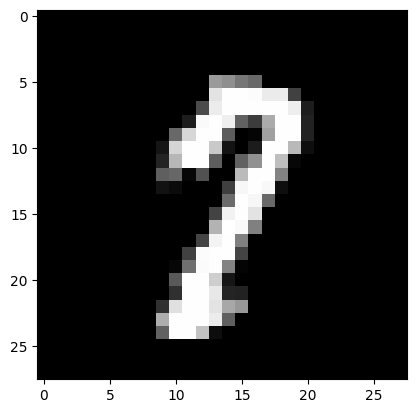

In [55]:
test_prediction(42, W1, b1, W2, b2)